### Lab 1 Perceptron: Binary Classification from Scratch

Objective: Implement a perceptron and train it on a toy dataset



In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate a synthetic binary classification dataset
np.random.seed(42)
n_samples = 100

# Class 0: centered at (2, 2)
class0 = np.random.randn(n_samples//2, 2) + np.array([2, 2])
# Class 1: centered at (4, 4)
class1 = np.random.randn(n_samples//2, 2) + np.array([4, 4])

X = np.vstack((class0, class1))
y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

# Add bias term (x0 = 1)
X_bias = np.c_[np.ones((n_samples, 1)), X]


In [6]:
# 2. Initialize perceptron weights (w0 = bias, w1, w2)
weights = np.zeros(X_bias.shape[1])
learning_rate = 0.1
epochs = 20

errors_per_epoch = []


In [7]:
# 3. Perceptron training loop
for epoch in range(epochs):
    errors = 0
    for xi, target in zip(X_bias, y):
        # Step activation function
        prediction = 1 if np.dot(xi, weights) >= 0 else 0
        update = learning_rate * (target - prediction)
        weights += update * xi
        errors += int(update != 0.0)
    errors_per_epoch.append(errors)
    print(f"Epoch {epoch+1}/{epochs} - Misclassifications: {errors}")


Epoch 1/20 - Misclassifications: 2
Epoch 2/20 - Misclassifications: 3
Epoch 3/20 - Misclassifications: 2
Epoch 4/20 - Misclassifications: 3
Epoch 5/20 - Misclassifications: 2
Epoch 6/20 - Misclassifications: 3
Epoch 7/20 - Misclassifications: 2
Epoch 8/20 - Misclassifications: 2
Epoch 9/20 - Misclassifications: 3
Epoch 10/20 - Misclassifications: 3
Epoch 11/20 - Misclassifications: 2
Epoch 12/20 - Misclassifications: 3
Epoch 13/20 - Misclassifications: 2
Epoch 14/20 - Misclassifications: 4
Epoch 15/20 - Misclassifications: 3
Epoch 16/20 - Misclassifications: 3
Epoch 17/20 - Misclassifications: 2
Epoch 18/20 - Misclassifications: 3
Epoch 19/20 - Misclassifications: 2
Epoch 20/20 - Misclassifications: 4


In [8]:
# 4. Decision boundary function
def plot_decision_boundary(X, y, weights):
    plt.figure(figsize=(6, 5))
    # Scatter plot of points
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', marker='o', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', marker='x', label='Class 1')

    # Compute line: w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1)/w2
    x1_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    x2_vals = -(weights[0] + weights[1]*x1_vals) / weights[2]
    plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Perceptron Decision Boundary")
    plt.grid(True)
    plt.show()

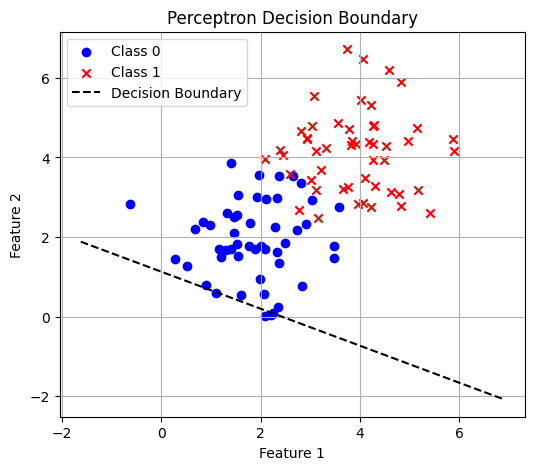

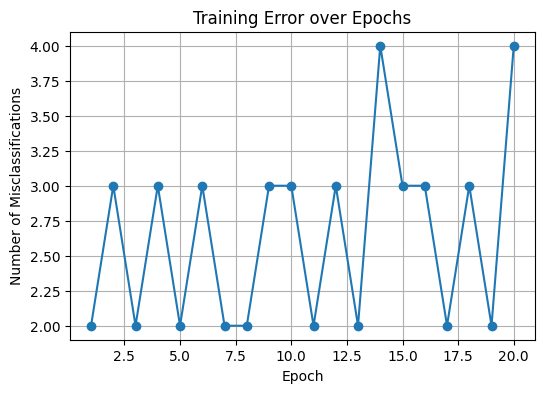

Final weights: [-0.7         0.28828342  0.61951852]


In [9]:
# 5. Plot decision boundary
plot_decision_boundary(X, y, weights)

# 6. Plot training errors per epoch
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs+1), errors_per_epoch, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Number of Misclassifications")
plt.title("Training Error over Epochs")
plt.grid(True)
plt.show()

print("Final weights:", weights)
